In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read csv file
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [4]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47045,31980666,11/14/2015 11:02:30 AM,11/14/2015 02:08:32 PM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11358.0,43-61 161 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.758377,-73.805185,"(40.758377273679386, -73.80518542890631)"
47046,31982224,11/14/2015 11:00:59 AM,11/14/2015 01:55:48 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10310.0,614 CARY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.632028,-74.122167,"(40.632028408561006, -74.12216666543866)"
47047,31986021,11/14/2015 11:00:28 AM,11/14/2015 11:42:22 AM,NYPD,New York City Police Department,Animal Abuse,Neglected,Store/Commercial,11370.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.759330,-73.885104,"(40.75933008575395, -73.88510434923467)"
47048,31983677,11/14/2015 10:59:17 AM,11/14/2015 12:51:31 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453.0,1685 JEROME AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.846368,-73.913316,"(40.84636809667345, -73.91331613201108)"


In [5]:
#1.1 Identify the shape of the dataset
df.shape

(47050, 53)

In [6]:
#1.2 Identify variables with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47050 entries, 0 to 47049
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      47050 non-null  int64  
 1   Created Date                    47050 non-null  object 
 2   Closed Date                     46790 non-null  object 
 3   Agency                          47050 non-null  object 
 4   Agency Name                     47050 non-null  object 
 5   Complaint Type                  47050 non-null  object 
 6   Descriptor                      46387 non-null  object 
 7   Location Type                   47050 non-null  object 
 8   Incident Zip                    46749 non-null  float64
 9   Incident Address                41593 non-null  object 
 10  Street Name                     41593 non-null  object 
 11  Cross Street 1                  40880 non-null  object 
 12  Cross Street 2                  

In [7]:
(df.isna().sum(axis=0)>0).sum()

31

In [8]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
47045,31980666,11/14/2015 11:02:30 AM,11/14/2015 02:08:32 PM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11358.0,43-61 161 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.758377,-73.805185,"(40.758377273679386, -73.80518542890631)"
47046,31982224,11/14/2015 11:00:59 AM,11/14/2015 01:55:48 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10310.0,614 CARY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.632028,-74.122167,"(40.632028408561006, -74.12216666543866)"
47047,31986021,11/14/2015 11:00:28 AM,11/14/2015 11:42:22 AM,NYPD,New York City Police Department,Animal Abuse,Neglected,Store/Commercial,11370.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.759330,-73.885104,"(40.75933008575395, -73.88510434923467)"
47048,31983677,11/14/2015 10:59:17 AM,11/14/2015 12:51:31 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453.0,1685 JEROME AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.846368,-73.913316,"(40.84636809667345, -73.91331613201108)"
47049,31977067,11/14/2015 10:59:06 AM,11/14/2015 12:14:52 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10007.0,CITY HALL PARK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dff = pd.DataFrame(df.isna().sum(axis=0),columns=['Nulls'])
dff
dff[(dff['Nulls'] >0) == True]

,Nulls
Closed Date,260
Descriptor,663
Incident Zip,301
Incident Address,5457
Street Name,5457
Cross Street 1,6170
Cross Street 2,6217
Intersection Street 1,41650
Intersection Street 2,41703
Address Type,344


In [11]:
for i in df.columns:
    print(i, " : Unique Values in the variable are :", len(df[i].unique()))
    print(df[i].unique())
    print("_"*40)

Unique Key  : Unique Values in the variable are : 47050
[32310363 32309934 32309159 ... 31986021 31983677 31977067]
________________________________________
Created Date  : Unique Values in the variable are : 46764
['12/31/2015 11:59:45 PM' '12/31/2015 11:59:44 PM'
 '12/31/2015 11:59:29 PM' ... '11/14/2015 11:00:28 AM'
 '11/14/2015 10:59:17 AM' '11/14/2015 10:59:06 AM']
________________________________________
Closed Date  : Unique Values in the variable are : 44081
['01/01/2016 12:55:15 AM' '01/01/2016 01:26:57 AM'
 '01/01/2016 04:51:03 AM' ... '11/14/2015 11:42:22 AM'
 '11/14/2015 12:51:31 PM' '11/14/2015 12:14:52 PM']
________________________________________
Agency  : Unique Values in the variable are : 1
['NYPD']
________________________________________
Agency Name  : Unique Values in the variable are : 2
['New York City Police Department' 'NYPD']
________________________________________
Complaint Type  : Unique Values in the variable are : 20
['Noise - Street/Sidewalk' 'Blocked Dr

In [12]:
#2. Perform basic data exploratory analysis:

numerical_columns_df = df.select_dtypes(include = np.number)
categorical_columns_df = df.select_dtypes(exclude = np.number)
numerical_columns_df.shape


(47050, 13)

In [13]:
categorical_columns_df.shape

(47050, 40)

In [14]:
categorical_columns_df.describe()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,...,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Location
count,47050,46790,47050,47050,47050,46387,47050,41593,41593,40880,...,47050,47050,47050,47050,47049,44,44,35,35,46648
unique,46764,44080,1,2,20,39,14,24970,4116,3577,...,1,1,1,1,1,17,23,2,34,28705
top,12/23/2015 06:33:50 PM,12/07/2015 12:35:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,1207 BEACH AVENUE,BROADWAY,BEND,...,Unspecified,Unspecified,Unspecified,Unspecified,N,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),"(40.83036235589997, -73.86602154214397)"
freq,3,2,47050,47049,14876,11164,39052,244,542,656,...,47050,47050,47050,47050,47049,8,5,28,2,244


In [15]:
numerical_columns_df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude
count,4.705000e+04,46749.000000,4.664900e+04,46649.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46648.000000,46648.000000
mean,3.214980e+07,10877.852168,1.004420e+06,201525.200840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.719765,-73.927195
std,9.346085e+04,575.276739,2.234695e+04,29387.588114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080658,0.080596
min,3.197681e+07,83.000000,9.133570e+05,121998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.501279,-74.254937
25%,3.207253e+07,10451.000000,9.905180e+05,180444.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661859,-73.977372
50%,3.215360e+07,11211.000000,1.002851e+06,199687.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714674,-73.932869
75%,3.222959e+07,11249.000000,1.019487e+06,218639.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.766749,-73.872831
max,3.231065e+07,11697.000000,1.067154e+06,271391.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.911533,-73.700837


In [16]:
#2.1 Utilize missing value treatment
numerical_columns_df.isna().sum()


Unique Key                          0
Incident Zip                      301
X Coordinate (State Plane)        401
Y Coordinate (State Plane)        401
School or Citywide Complaint    47050
Vehicle Type                    47050
Taxi Company Borough            47050
Taxi Pick Up Location           47050
Garage Lot Name                 47050
Ferry Direction                 47050
Ferry Terminal Name             47050
Latitude                          402
Longitude                         402
dtype: int64

In [17]:
# drop the columns with all empty rows or the columns having all null data
numerical_columns_df=numerical_columns_df.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name','Ferry Direction','Ferry Terminal Name'], axis=1)

In [18]:
numerical_columns_df.isna().sum()

Unique Key                      0
Incident Zip                  301
X Coordinate (State Plane)    401
Y Coordinate (State Plane)    401
Latitude                      402
Longitude                     402
dtype: int64

In [19]:
numerical_columns_df['Incident Zip'].fillna(numerical_columns_df['Incident Zip'].mean(),inplace=True)
numerical_columns_df['X Coordinate (State Plane)'].fillna(numerical_columns_df['X Coordinate (State Plane)'].mean(),inplace=True)
numerical_columns_df['Y Coordinate (State Plane)'].fillna(numerical_columns_df['Y Coordinate (State Plane)'].mean(),inplace=True)

In [20]:
numerical_columns_df.isna().sum()

Unique Key                      0
Incident Zip                    0
X Coordinate (State Plane)      0
Y Coordinate (State Plane)      0
Latitude                      402
Longitude                     402
dtype: int64

In [21]:
numerical_columns_df.shape

(47050, 6)

In [22]:
percentage_of_missing_values=(numerical_columns_df['Latitude'].isna().sum(axis=0)/numerical_columns_df.shape[0])*100

In [23]:
percentage_of_missing_values

0.8544102019128588

In [24]:
#since the percentage is less than 1, so we can drop the rows with missing values
numerical_columns_df=numerical_columns_df.dropna(axis=0)
numerical_columns_df

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,32310363,10034.0,1005409.0,254678.0,40.865682,-73.923501
1,32309934,11105.0,1007766.0,221986.0,40.775945,-73.915094
2,32309159,10458.0,1015081.0,256380.0,40.870325,-73.888525
3,32305098,10461.0,1031740.0,243899.0,40.835994,-73.828379
4,32306529,11373.0,1019123.0,206375.0,40.733060,-73.874170
...,...,...,...,...,...,...
47044,31978460,11223.0,991963.0,157362.0,40.598595,-73.972226
47045,31980666,11358.0,1038221.0,215634.0,40.758377,-73.805185
47046,31982224,10310.0,950341.0,169565.0,40.632028,-74.122167
47047,31986021,11370.0,1016080.0,215942.0,40.759330,-73.885104


In [25]:
numerical_columns_df.shape

(46648, 6)

In [26]:
numerical_columns_df.isna().sum(axis=0)

Unique Key                    0
Incident Zip                  0
X Coordinate (State Plane)    0
Y Coordinate (State Plane)    0
Latitude                      0
Longitude                     0
dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


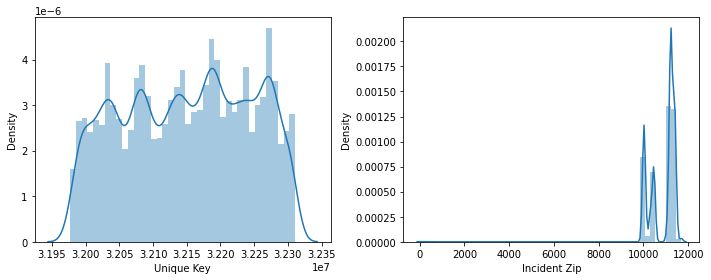

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


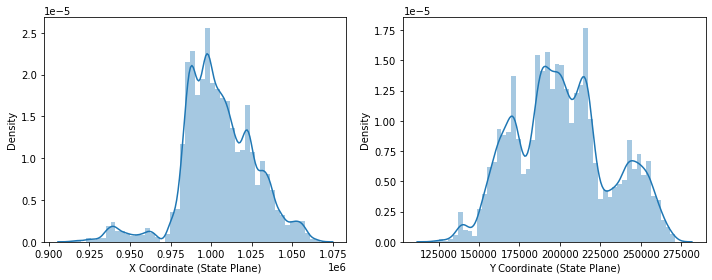

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


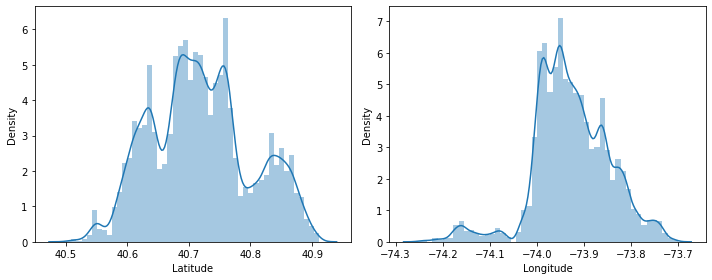

In [27]:
numerical_columns = numerical_columns_df.columns
for i in range(0,len(numerical_columns),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(numerical_columns_df[numerical_columns[i]])
        plt.subplot(122)            
        sns.distplot(numerical_columns_df[numerical_columns[i+1]])
        plt.tight_layout()
        plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


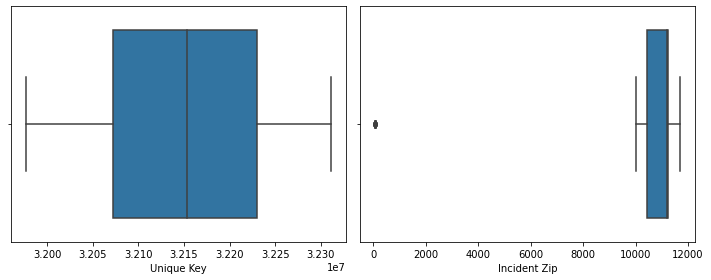

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


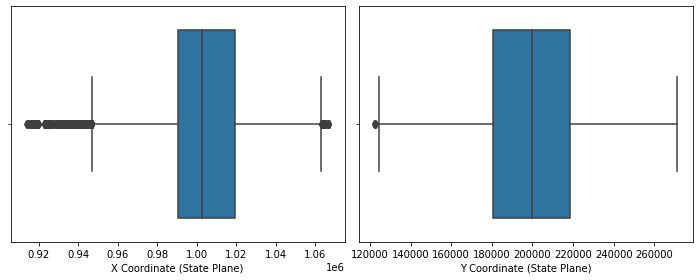

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


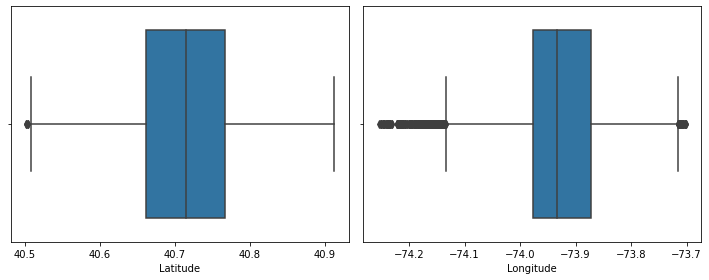

In [28]:
numerical_columns = numerical_columns_df.columns
for i in range(0,len(numerical_columns),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(numerical_columns_df[numerical_columns[i]])
        plt.subplot(122)            
        sns.boxplot(numerical_columns_df[numerical_columns[i+1]])
        plt.tight_layout()
        plt.show()

In [29]:
categorical_columns_df.shape

(47050, 40)

In [30]:
categorical_columns_df.isna().sum(axis=0)

Created Date                          0
Closed Date                         260
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                          663
Location Type                         0
Incident Address                   5457
Street Name                        5457
Cross Street 1                     6170
Cross Street 2                     6217
Intersection Street 1             41650
Intersection Street 2             41703
Address Type                        344
City                                302
Landmark                          47025
Facility Type                       255
Status                                0
Due Date                              0
Resolution Description                0
Resolution Action Updated Date      255
Community Board                       0
Borough                               0
Park Facility Name                    0
Park Borough                          0


In [31]:
categorical_columns_df=categorical_columns_df.drop(['Bridge Highway Segment','Road Ramp','Bridge Highway Direction','Bridge Highway Name','Landmark','Intersection Street 2','Intersection Street 1'], axis=1)
categorical_columns_df.shape

(47050, 33)

In [32]:
categorical_columns_df.isna().sum(axis=0)

Created Date                         0
Closed Date                        260
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                         663
Location Type                        0
Incident Address                  5457
Street Name                       5457
Cross Street 1                    6170
Cross Street 2                    6217
Address Type                       344
City                               302
Facility Type                      255
Status                               0
Due Date                             0
Resolution Description               0
Resolution Action Updated Date     255
Community Board                      0
Borough                              0
Park Facility Name                   0
Park Borough                         0
School Name                          0
School Number                        0
School Region                        0
School Code              

In [33]:
categorical_columns_df.mode()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,...,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Location
0,12/23/2015 06:33:50 PM,01/01/2016 02:09:45 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,1207 BEACH AVENUE,BROADWAY,BEND,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.83036235589997, -73.86602154214397)"
1,NaN,01/01/2016 12:28:31 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,11/14/2015 01:52:36 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,11/14/2015 02:05:21 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,11/14/2015 02:10:40 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,NaN,12/31/2015 11:58:48 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2706,NaN,12/31/2015 12:29:37 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2707,NaN,12/31/2015 12:32:53 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2708,NaN,12/31/2015 12:57:15 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
categorical_columns_df['Closed Date'].fillna(categorical_columns_df['Closed Date'].mode()[0],inplace = True)
categorical_columns_df['Descriptor'].fillna(categorical_columns_df['Descriptor'].mode()[0],inplace = True)
categorical_columns_df['Incident Address'].fillna(categorical_columns_df['Incident Address'].mode()[0],inplace = True)
categorical_columns_df['Street Name'].fillna(categorical_columns_df['Street Name'].mode()[0],inplace = True)
categorical_columns_df['Cross Street 1'].fillna(categorical_columns_df['Cross Street 1'].mode()[0],inplace = True)
categorical_columns_df['Cross Street 2'].fillna(categorical_columns_df['Cross Street 2'].mode()[0],inplace = True)
categorical_columns_df['Address Type'].fillna(categorical_columns_df['Address Type'].mode()[0],inplace = True)

categorical_columns_df['City'].fillna(categorical_columns_df['City'].mode()[0],inplace = True)
categorical_columns_df['Facility Type'].fillna(categorical_columns_df['Facility Type'].mode()[0],inplace = True)
categorical_columns_df['Resolution Action Updated Date'].fillna(categorical_columns_df['Resolution Action Updated Date'].mode()[0],inplace = True)
categorical_columns_df['Location'].fillna(categorical_columns_df['Location'].mode()[0],inplace = True)
categorical_columns_df['School Not Found'].fillna(categorical_columns_df['School Not Found'].mode()[0],inplace = True)

In [35]:
categorical_columns_df.isna().sum(axis=0)

Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number                     0
School Region                     0
School Code                       0
School Phone Number               0
School Address              

In [36]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [38]:
#Find the top 10 types of complaints
df['Complaint Type'].value_counts()

Blocked Driveway             14876
Illegal Parking              13519
Noise - Commercial            6206
Noise - Street/Sidewalk       4052
Derelict Vehicle              2829
Noise - Vehicle               1915
Animal Abuse                  1174
Traffic                        654
Homeless Encampment            526
Vending                        483
Posting Advertisement          242
Noise - Park                   174
Drinking                       165
Noise - House of Worship        75
Urinating in Public             46
Panhandling                     46
Bike/Roller/Skate Chronic       42
Graffiti                        12
Disorderly Youth                11
Illegal Fireworks                3
Name: Complaint Type, dtype: int64

In [39]:
complaint_count= df['Complaint Type'].value_counts()

In [48]:
df['Complaint Type'].value_counts()

Blocked Driveway             14876
Illegal Parking              13519
Noise - Commercial            6206
Noise - Street/Sidewalk       4052
Derelict Vehicle              2829
Noise - Vehicle               1915
Animal Abuse                  1174
Traffic                        654
Homeless Encampment            526
Vending                        483
Posting Advertisement          242
Noise - Park                   174
Drinking                       165
Noise - House of Worship        75
Urinating in Public             46
Panhandling                     46
Bike/Roller/Skate Chronic       42
Graffiti                        12
Disorderly Youth                11
Illegal Fireworks                3
Name: Complaint Type, dtype: int64

In [49]:
Complaint_type=df['Complaint Type']

In [50]:
complaint_count=df['Complaint Type'].value_counts()

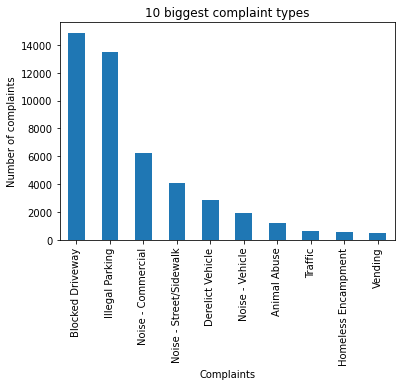

In [52]:
#get the 10 most important complaints that there are reported, create a new dataset
df_plot10=complaint_count.head(10).transpose()

#make a bar plot of the top 10 complaints with the dataset created
df_plot10.plot(kind='bar')
plt.title('10 biggest complaint types')
plt.xlabel('Complaints')
plt.ylabel('Number of complaints')
plt.show()

In [45]:
new_dataset=df[['City','Complaint Type']]

In [46]:
#Display the types of complaints in each city in a separate dataset
new_dataset

,City,Complaint Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking
...,...,...
47045,FLUSHING,Blocked Driveway
47046,STATEN ISLAND,Blocked Driveway
47047,EAST ELMHURST,Animal Abuse
47048,BRONX,Blocked Driveway


In [47]:
new_dataset.shape

(47050, 2)

<AxesSubplot:>

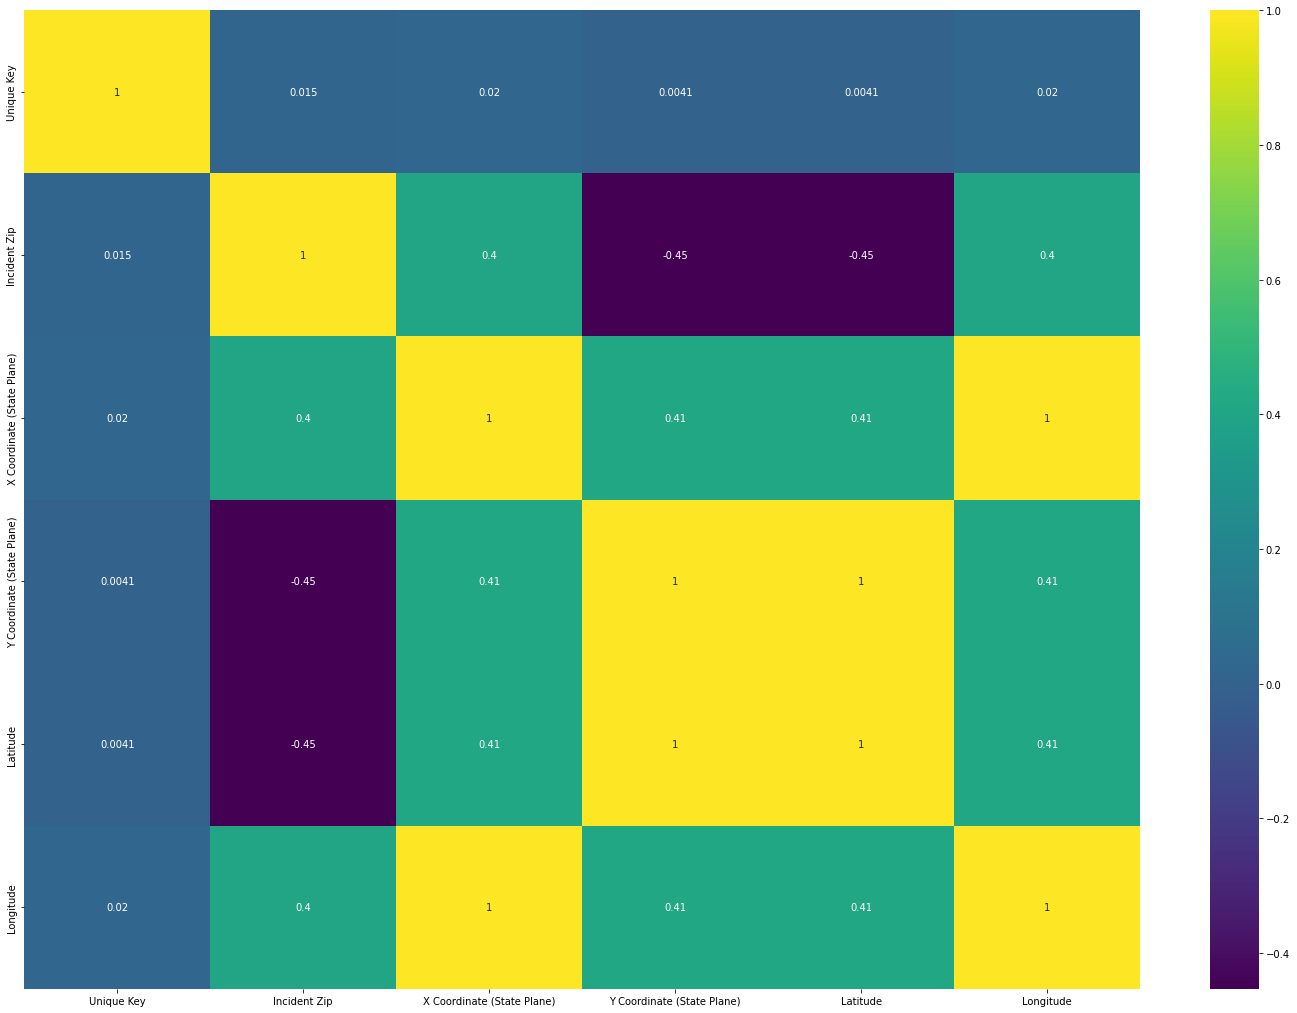

In [54]:
plt.figure(figsize=(25,18))
sns.heatmap(numerical_columns_df.corr(), cmap='viridis',annot=True)

In [58]:
#Identify significant variables by performing a statistical analysis using p-values and chi-square values
categorical_columns_df['Complaint Type']

0        Noise - Street/Sidewalk
1               Blocked Driveway
2               Blocked Driveway
3                Illegal Parking
4                Illegal Parking
                  ...           
47045           Blocked Driveway
47046           Blocked Driveway
47047               Animal Abuse
47048           Blocked Driveway
47049    Noise - Street/Sidewalk
Name: Complaint Type, Length: 47050, dtype: object

In [59]:
categorical_columns_df.columns


Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Location'],
      dtype='object')

In [61]:
Complaint_Type_table = pd.crosstab(index=categorical_columns_df['Complaint Type'],columns="count")


In [62]:
Complaint_Type_table

col_0,count
Complaint Type,
Animal Abuse,1174
Bike/Roller/Skate Chronic,42
Blocked Driveway,14876
Derelict Vehicle,2829
Disorderly Youth,11
Drinking,165
Graffiti,12
Homeless Encampment,526
Illegal Fireworks,3
